In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from datetime import datetime, timedelta
import math
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("Thesis_Data/Cybersecurity_attacks.csv")
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


In [3]:
# Attack subcategory

# Let's fill the null value in this column as "Not Registered"

df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

In [4]:
# Attack Reference

# Let's fill the null value in this column as "NA"

df["Attack Reference"] = df["Attack Reference"].fillna("NA")

In [5]:
# Drop the Duplicates

df = df.drop(df[df.duplicated()].index)

In [6]:
df.shape

(178025, 11)

In [7]:
# Removing Invalid Value of Source Port and Destination Port

invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)

df = df[~(invalid_SP | invalid_DP)].reset_index(drop=True)

In [8]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()

In [9]:
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')

In [10]:
df[['Start time','Last time']] = df['Time'].str.split('-',expand=True)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [11]:
df = df.drop(['.', 'Time'],axis=1)# Drop columns and make a copy in memory of the object
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [12]:
df_tcp = pd.read_csv("Thesis_Data/TCP-ports.xls")
df_tcp.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,tcpmux,TCP Port Service Multiplexer
2,2,compressnet,Management Utility
3,3,compressnet,Compression Process
4,5,rje,Remote Job Entry


In [13]:
df_tcp['Service'] = df_tcp['Service'].str.upper()

In [14]:
print('Dimensions before merging dataframes: ' ,(df.shape))

newdf = pd.merge(df, df_tcp[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf = newdf.rename(columns={'Service':'Destination Port Service'})

print('Dimensions after merging dataframes: ' + str(newdf.shape))

Dimensions before merging dataframes:  (174341, 11)
Dimensions after merging dataframes: (174341, 13)


In [15]:
newdf = newdf.drop(columns=['Port'])
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,HTTP


In [16]:
newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.seconds).astype(int)

In [17]:
t = []

l = ['GENERIC', 'BACKDOOR', 'ANALYSIS', 'SHELLCODE', 'WORMS']

for attack in newdf['Attack category']:
    
    if attack in l:
        t.append(0)
    else:
        t.append(1)

In [18]:
newdf['Class'] = t

In [19]:
model_df = newdf

In [20]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category', 'Source IP', 'Destination IP'])

In [21]:
df_dummies = df_dummies.drop(['Attack subcategory', 'Protocol', 'Attack Name', 'Attack Reference', 'Start time', 'Last time', 'Destination Port Service'],axis=1)

In [22]:
df_dummies.columns

Index(['Source Port', 'Destination Port', 'Duration', 'Class',
       'Attack category_ANALYSIS', 'Attack category_BACKDOOR',
       'Attack category_DOS', 'Attack category_EXPLOITS',
       'Attack category_FUZZERS', 'Attack category_GENERIC',
       'Attack category_RECONNAISSANCE', 'Attack category_SHELLCODE',
       'Attack category_WORMS', 'Source IP_175.45.176.0',
       'Source IP_175.45.176.1', 'Source IP_175.45.176.2',
       'Source IP_175.45.176.3', 'Destination IP_149.171.126.10',
       'Destination IP_149.171.126.11', 'Destination IP_149.171.126.12',
       'Destination IP_149.171.126.13', 'Destination IP_149.171.126.14',
       'Destination IP_149.171.126.15', 'Destination IP_149.171.126.16',
       'Destination IP_149.171.126.17', 'Destination IP_149.171.126.18',
       'Destination IP_149.171.126.19'],
      dtype='object')

In [23]:
y= df_dummies['Class'] #class variable
X = df_dummies.drop(columns = ['Class'])

print(y.shape)
print(X.shape)

(174341,)
(174341, 26)


In [24]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy as sp
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Classifier Libraries
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report

import collections

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from imblearn import over_sampling
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn import model_selection

# Stratify = yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [26]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

146567
102596
43971


In [27]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer(copy=False, method='yeo-johnson', standardize=True)
pt.fit(X_train)
pt.transform(X_train)
pt.fit(X_test)

pt.transform(X_test)

array([[-0.95132442, -0.93469538, -0.66589383, ..., -0.57223563,
        -0.28885746, -0.37558631],
       [-0.95132442, -0.93469538, -0.66589383, ..., -0.57223563,
        -0.28885746,  2.66250384],
       [ 1.22389122,  1.31345234, -0.66589383, ..., -0.57223563,
        -0.28885746, -0.37558631],
       ...,
       [ 0.53219134,  0.75846044, -0.66589383, ..., -0.57223563,
        -0.28885746, -0.37558631],
       [ 1.17004216,  0.9611235 , -0.66589383, ..., -0.57223563,
        -0.28885746,  2.66250384],
       [ 1.19821372,  0.87422604, -0.66589383, ..., -0.57223563,
         3.46191508, -0.37558631]])

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [29]:
ro_samp = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_rosamp, y_rosamp = ro_samp.fit_resample(X_train, y_train)

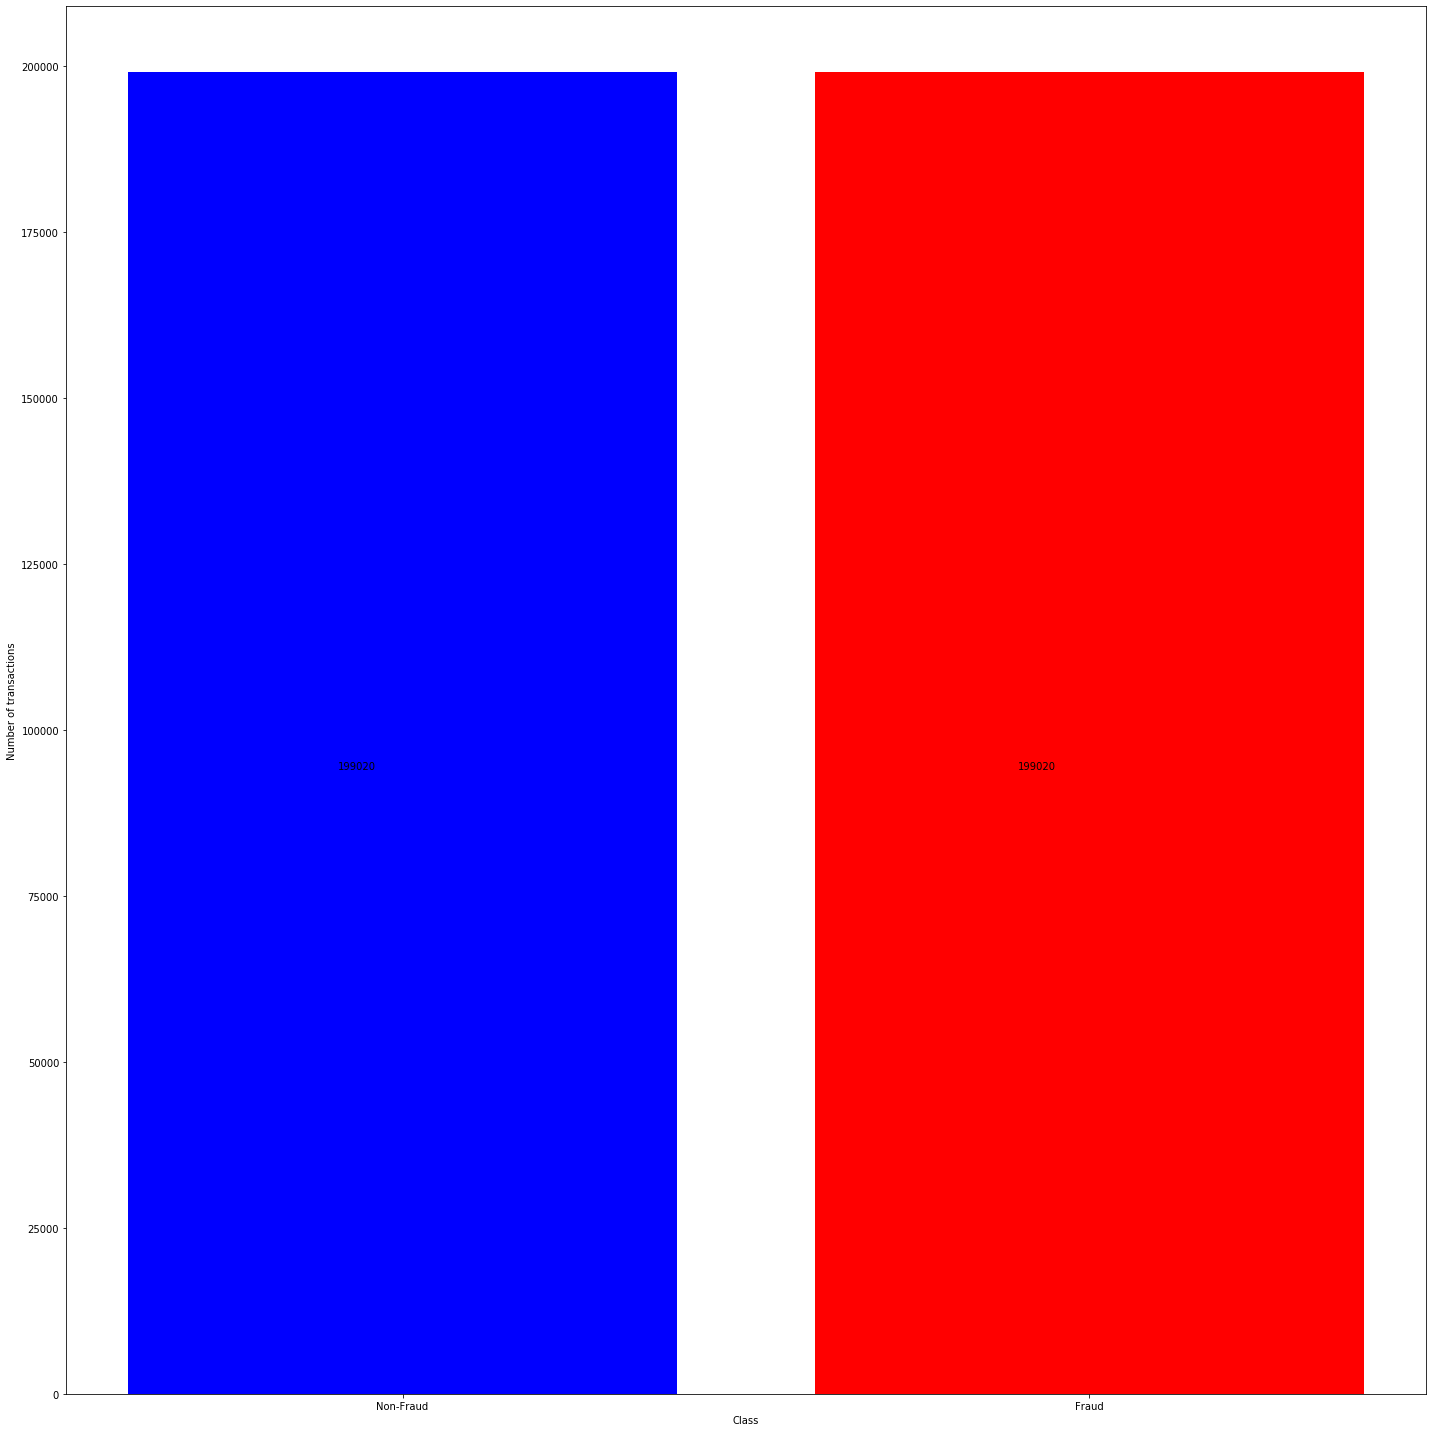

In [30]:
from collections import Counter

plt.bar(['Non-Fraud','Fraud'], [Counter(y_rosamp)[0], Counter(y_rosamp)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rosamp)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rosamp)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

In [31]:
#Checking if they have the same number of non-fraud cases

Counter(y_rosamp)[0] == Counter(y_train)[0]

True

### SMOTE

In [32]:
s = SMOTE(sampling_strategy='auto', random_state=42)
X_s, y_s = s.fit_resample(X_train, y_train)

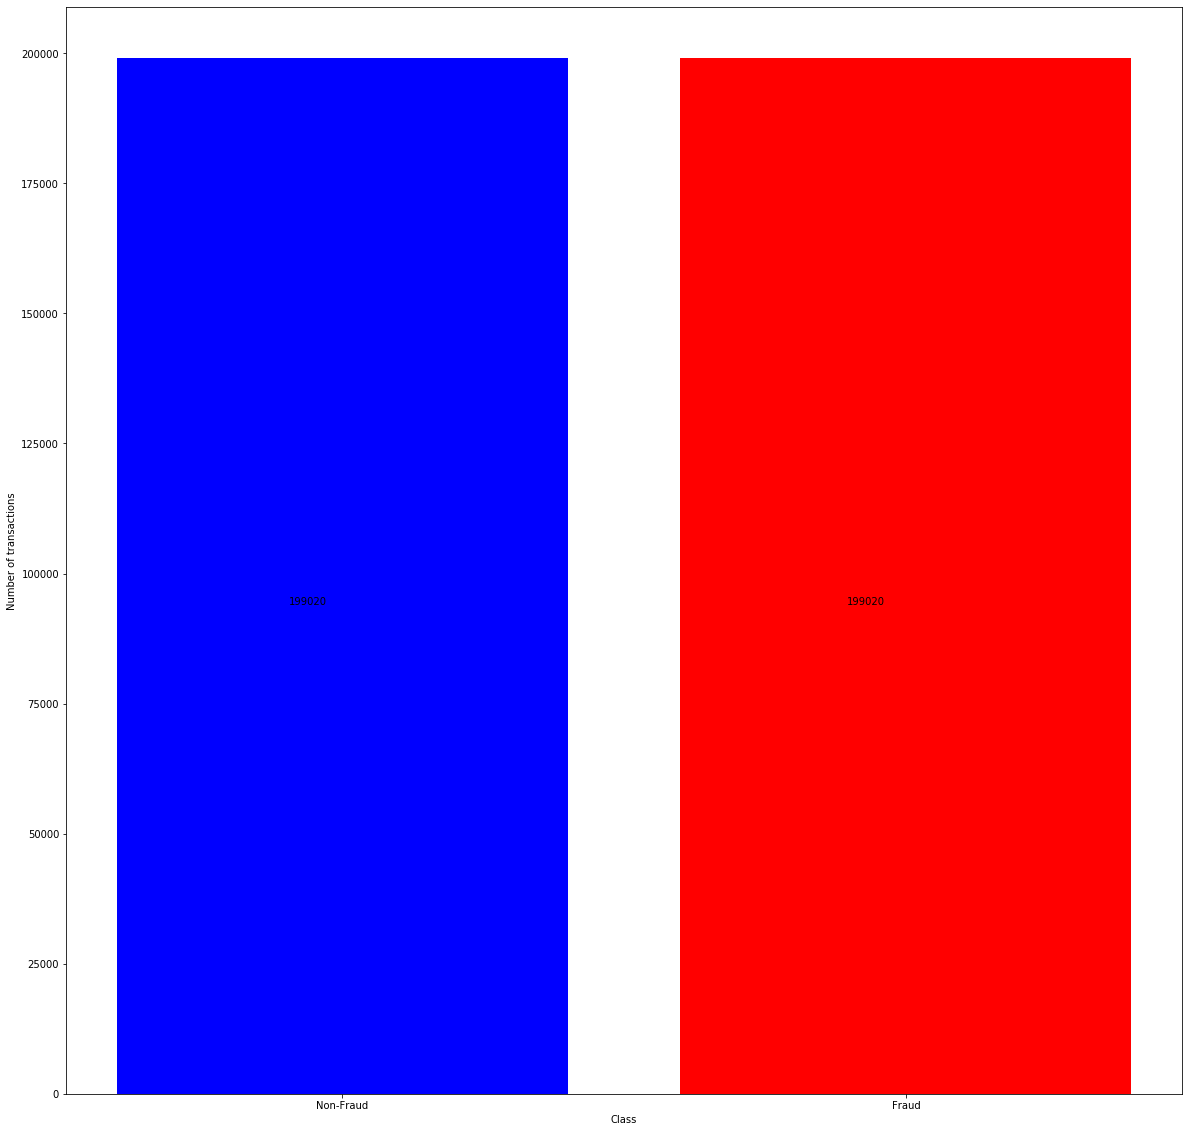

<Figure size 720x576 with 0 Axes>

In [33]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_s)[0], Counter(y_s)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_s)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_s)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.figure(figsize = (10,8))
plt.show()

In [34]:
#Checking if they have the same number of non-fraud cases

Counter(y_s)[0] == Counter(y_train)[0]

True

### ADASYN

In [35]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_a, y_a = adasyn.fit_resample(X_train, y_train)

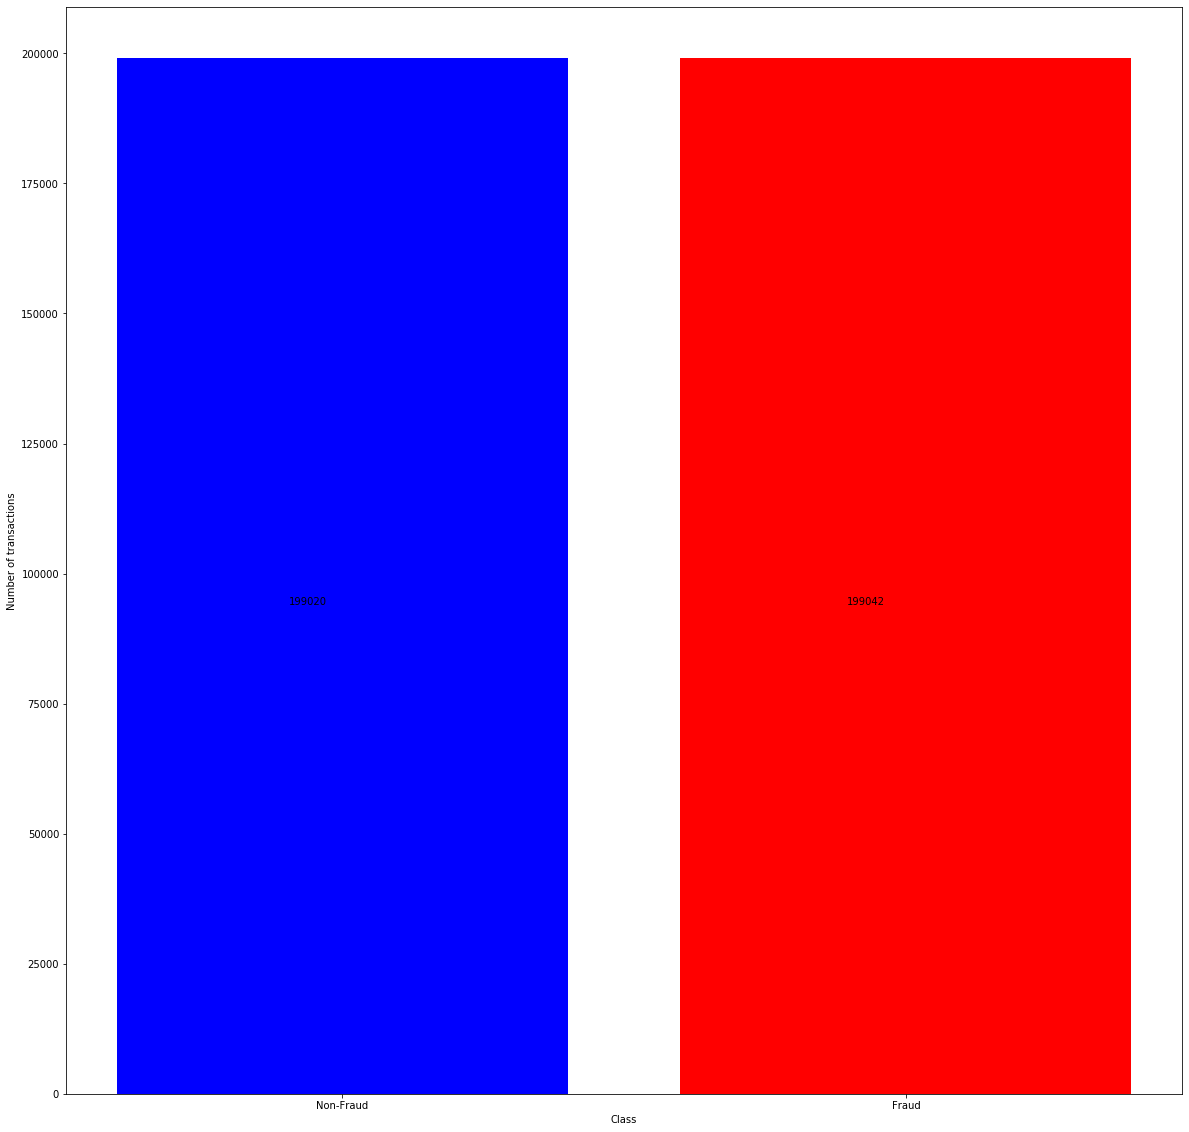

<Figure size 720x576 with 0 Axes>

In [36]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_a)[0], Counter(y_a)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_a)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_a)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.figure(figsize = (10,8))
plt.show()

In [37]:
#Checking if they have the same number of non-fraud cases

Counter(y_a)[0] == Counter(y_train)[0]

True

### Perform Feature Scalling

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def feature_scaling(X, X_test=X_test):
    std_scale = StandardScaler().fit(X)
    X_std = std_scale.transform(X)
    X_test_std = std_scale.transform(X_test)
    return X_std, X_test_std

In [39]:
X_rosamp_std, X_test_rosamp_std = feature_scaling(X_rosamp)
X_s_std, X_test_s_std = feature_scaling(X_s)
X_a_std, X_test_a_std = feature_scaling(X_a)

In [40]:
pca = PCA(n_components=2)
X_rosamp_pca = pca.fit_transform(X_rosamp_std)
X_s_pca = pca.fit_transform(X_s_std)
X_a_pca = pca.fit_transform(X_a_std)

## Model Building
- Build different models on the balanced dataset and see the result

In [41]:
from sklearn.ensemble import VotingClassifier
from scipy import interp
import itertools

model = []

model.append(('Logistic Regression', LogisticRegression(random_state=42)))
#model.append(('KNN', KNeighborsClassifier()))
model.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
model.append(('Random Forest', RandomForestClassifier(random_state=42)))
model.append(('XGboost', XGBClassifier()))

vc = VotingClassifier(estimators=model, voting='soft', weights=np.ones(len(model)))

In [42]:
def confusion_matrix_graph(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp


# Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.

def matrix_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
    name = classifier[0]
    classifier = classifier[1]
    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.figure(figsize = (8,6))
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    
    # Plot confusion matrix
    plt.figure(figsize = (8,4))
    confusion_matrix_graph(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

### Result using Oversampling

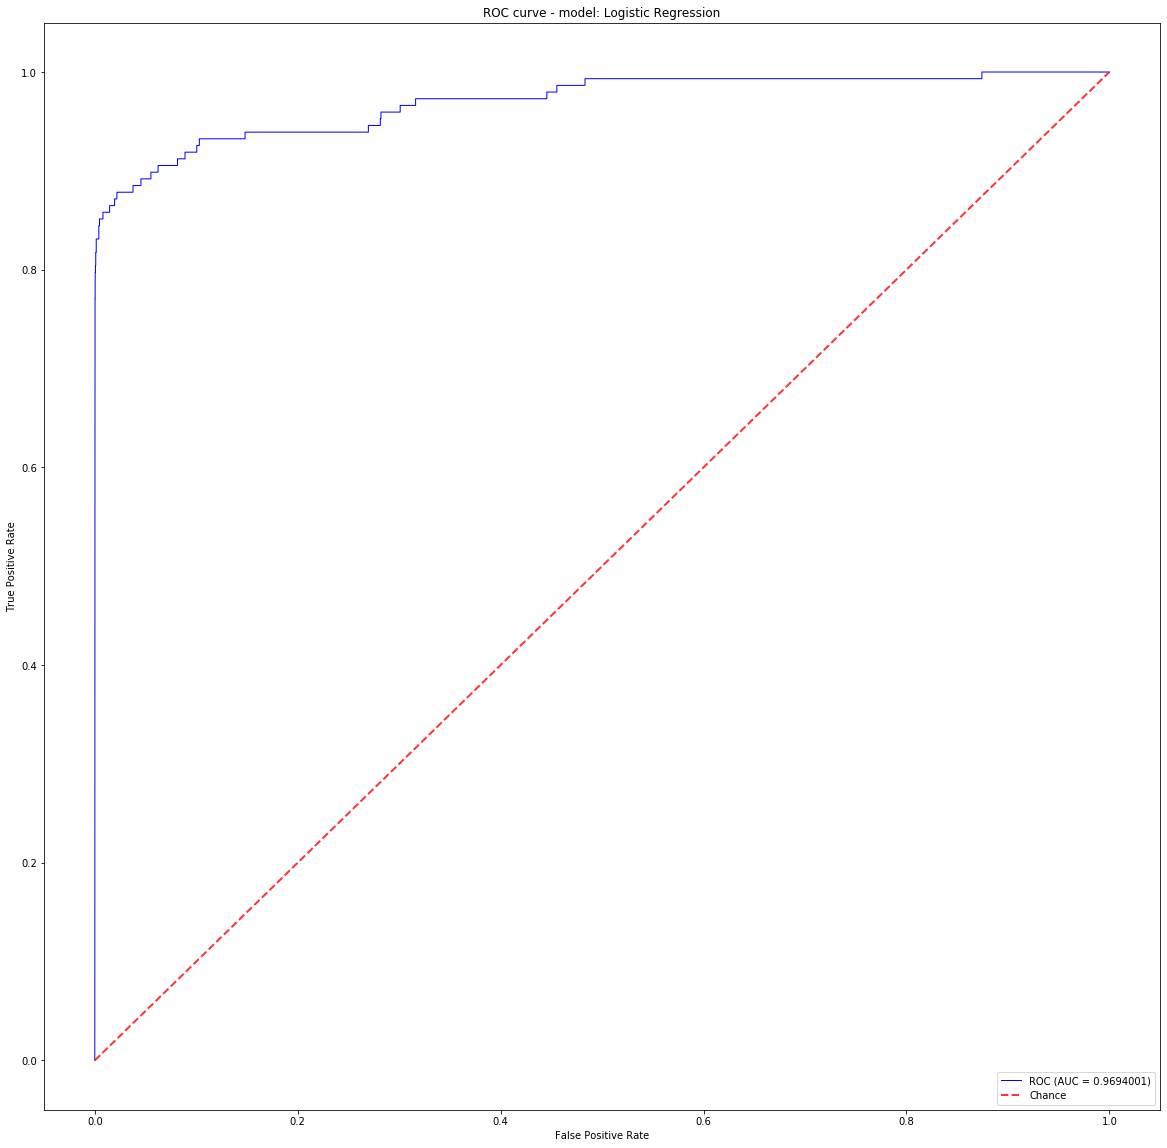

<Figure size 576x432 with 0 Axes>

Accuracy = 97.58%
Precision = 5.97%
Recall = 87.84%


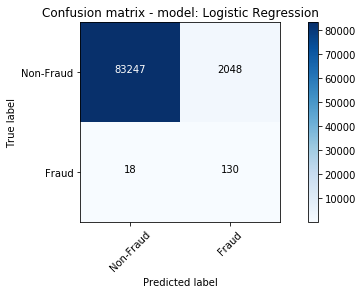

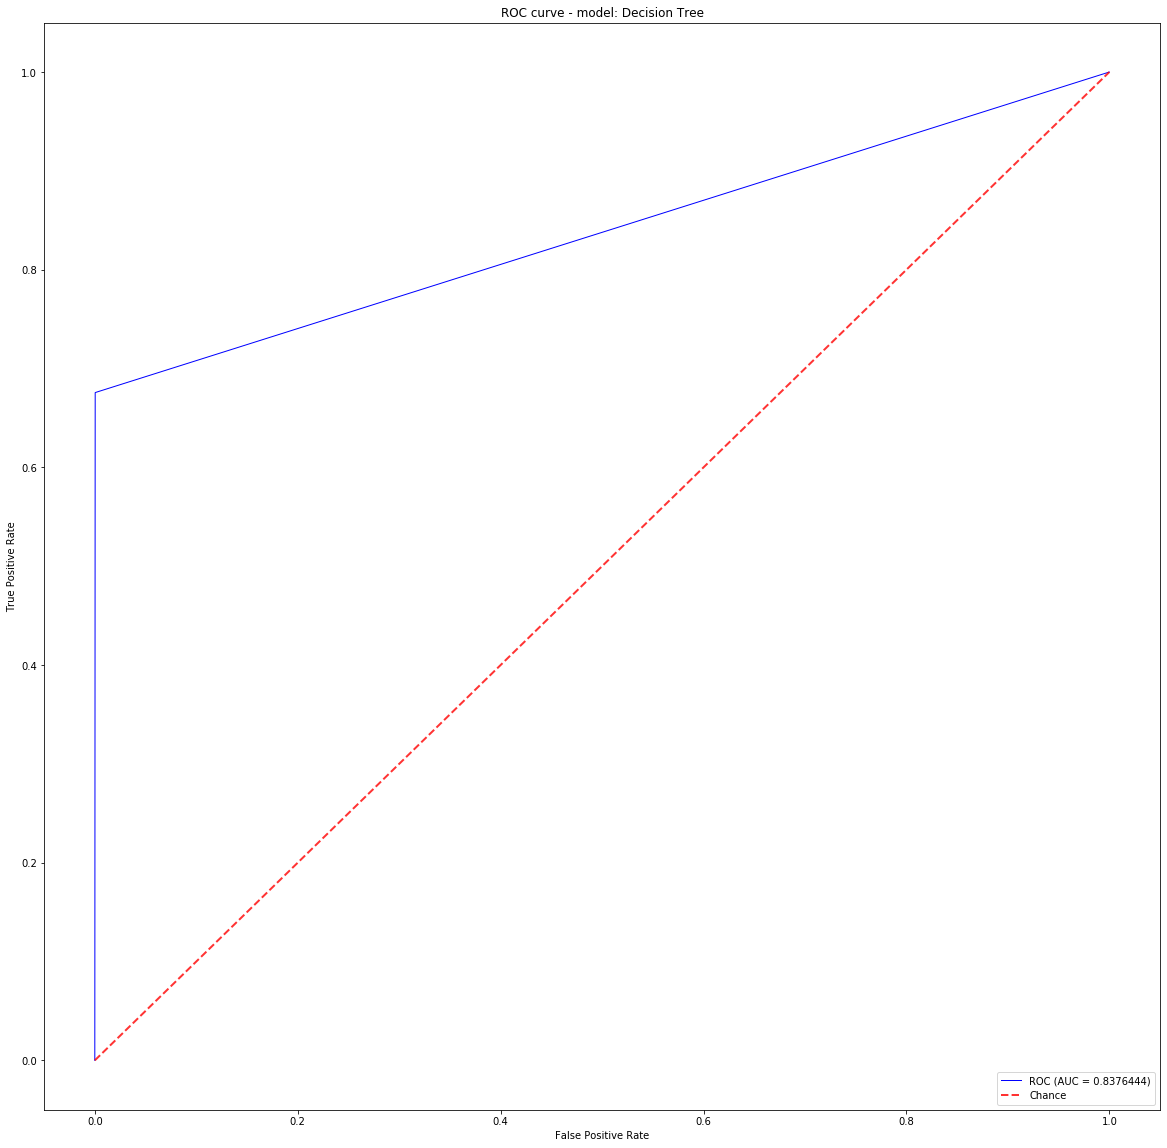

<Figure size 576x432 with 0 Axes>

Accuracy = 99.91%
Precision = 75.19%
Recall = 67.57%


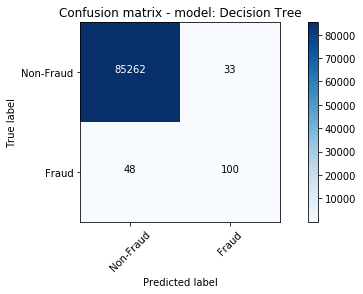

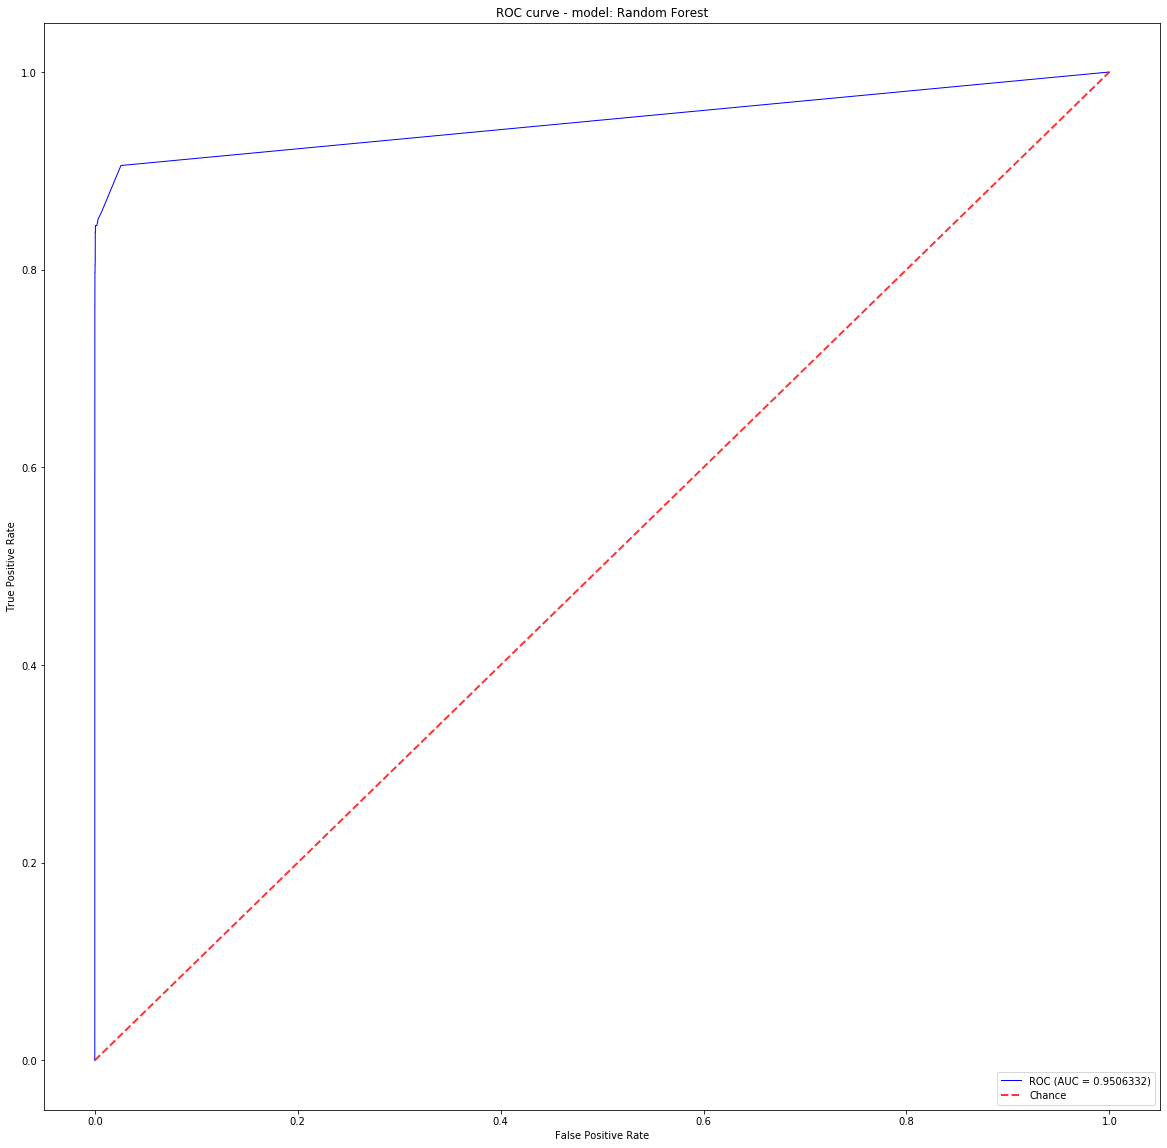

<Figure size 576x432 with 0 Axes>

Accuracy = 99.95%
Precision = 97.32%
Recall = 73.65%


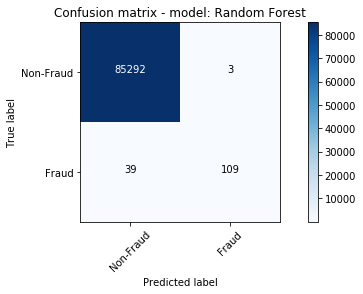

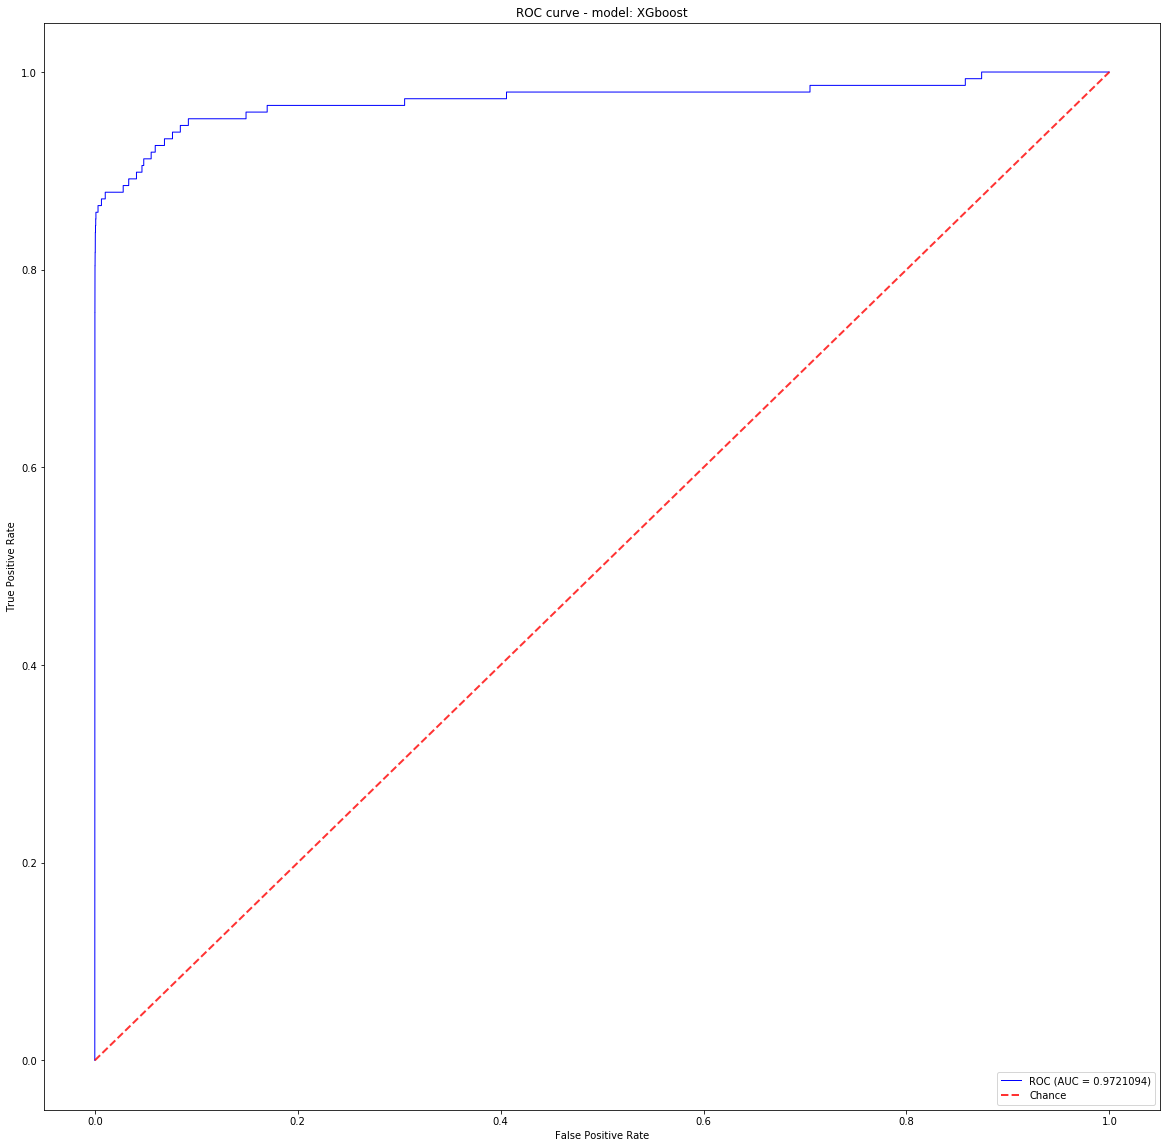

<Figure size 576x432 with 0 Axes>

Accuracy = 99.94%
Precision = 89.15%
Recall = 77.70%


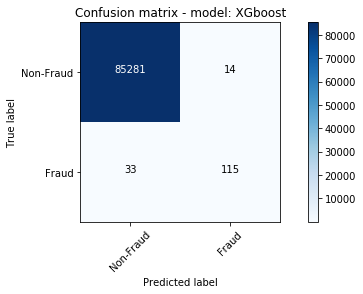

In [44]:
# Result using Oversampling

for clf in model:
    matrix_and_ROC_curve(clf, X_rosamp_std, y_rosamp, X_test_rosamp_std, y_test)

### Result with SMOTE

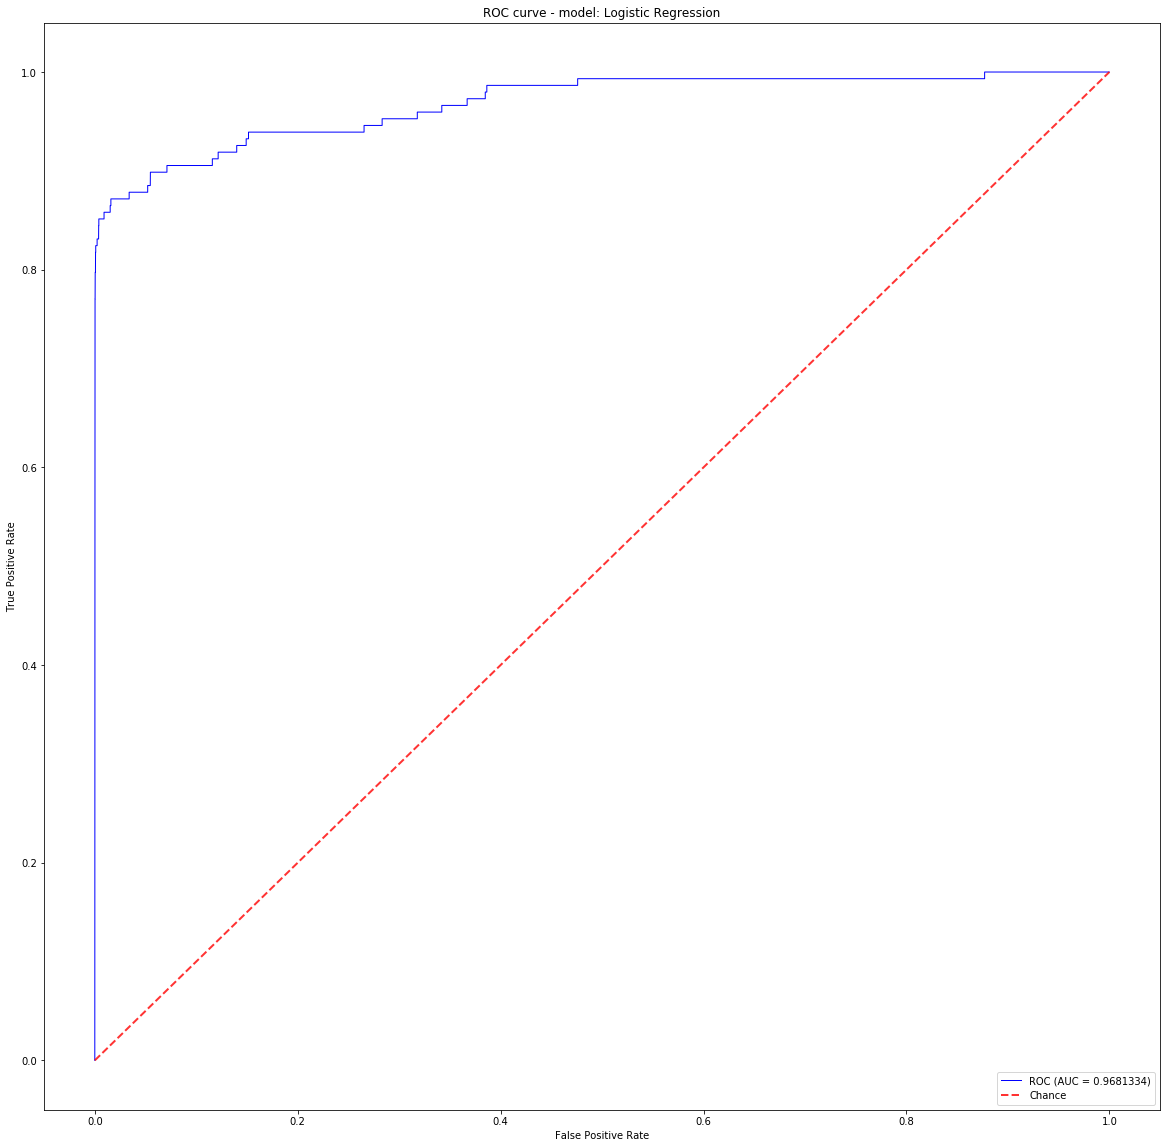

<Figure size 576x432 with 0 Axes>

Accuracy = 97.42%
Precision = 5.58%
Recall = 87.16%


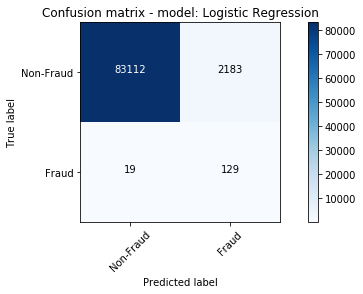

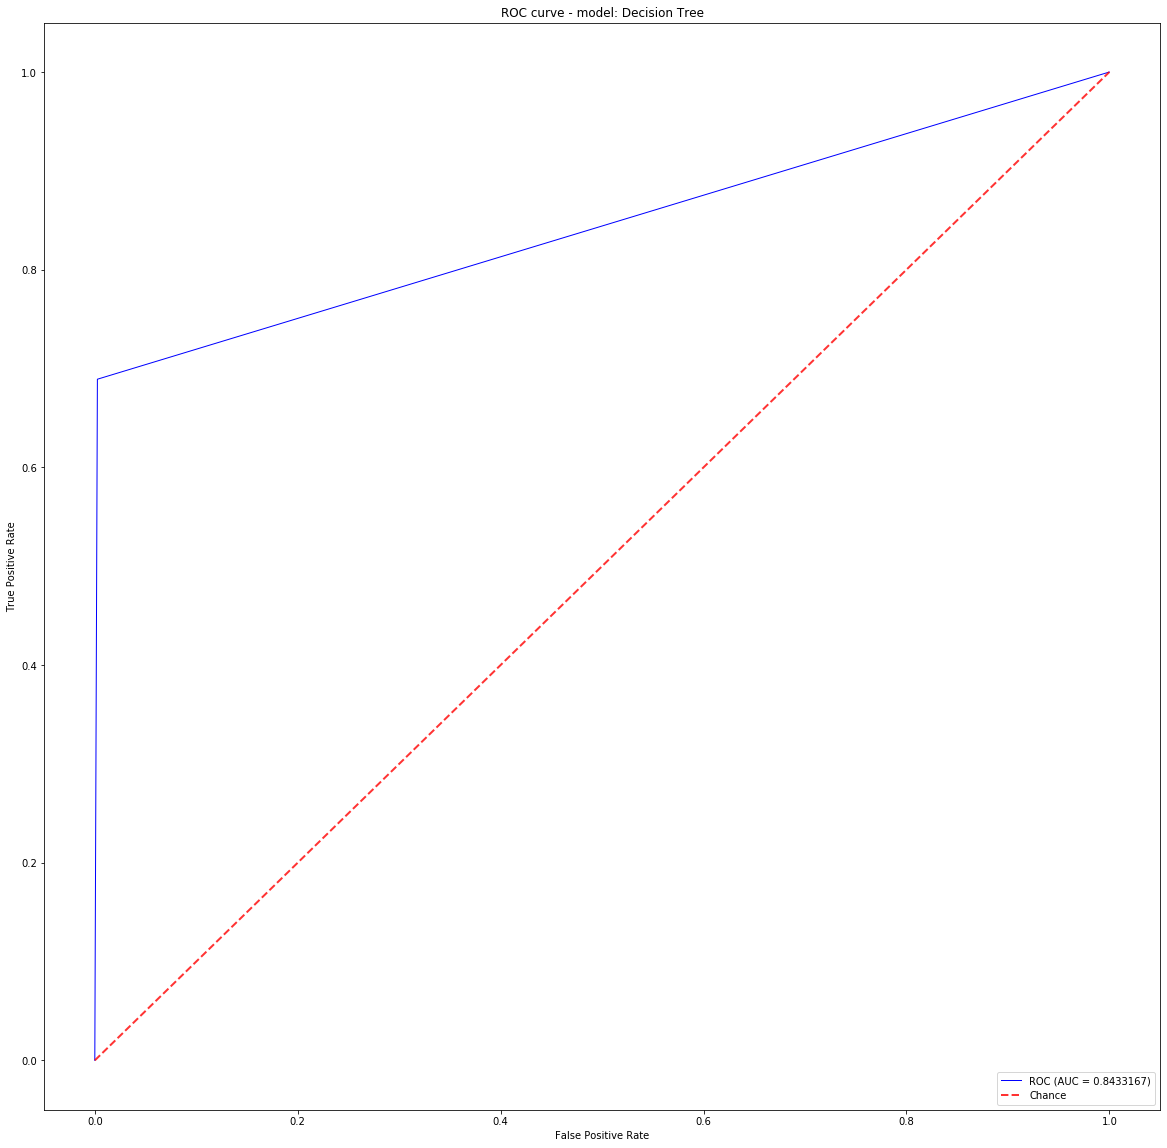

<Figure size 576x432 with 0 Axes>

Accuracy = 99.69%
Precision = 31.87%
Recall = 68.92%


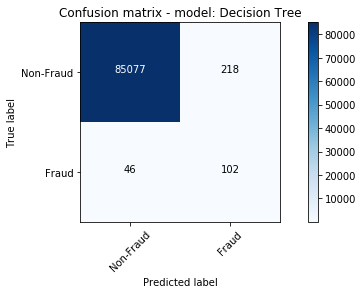

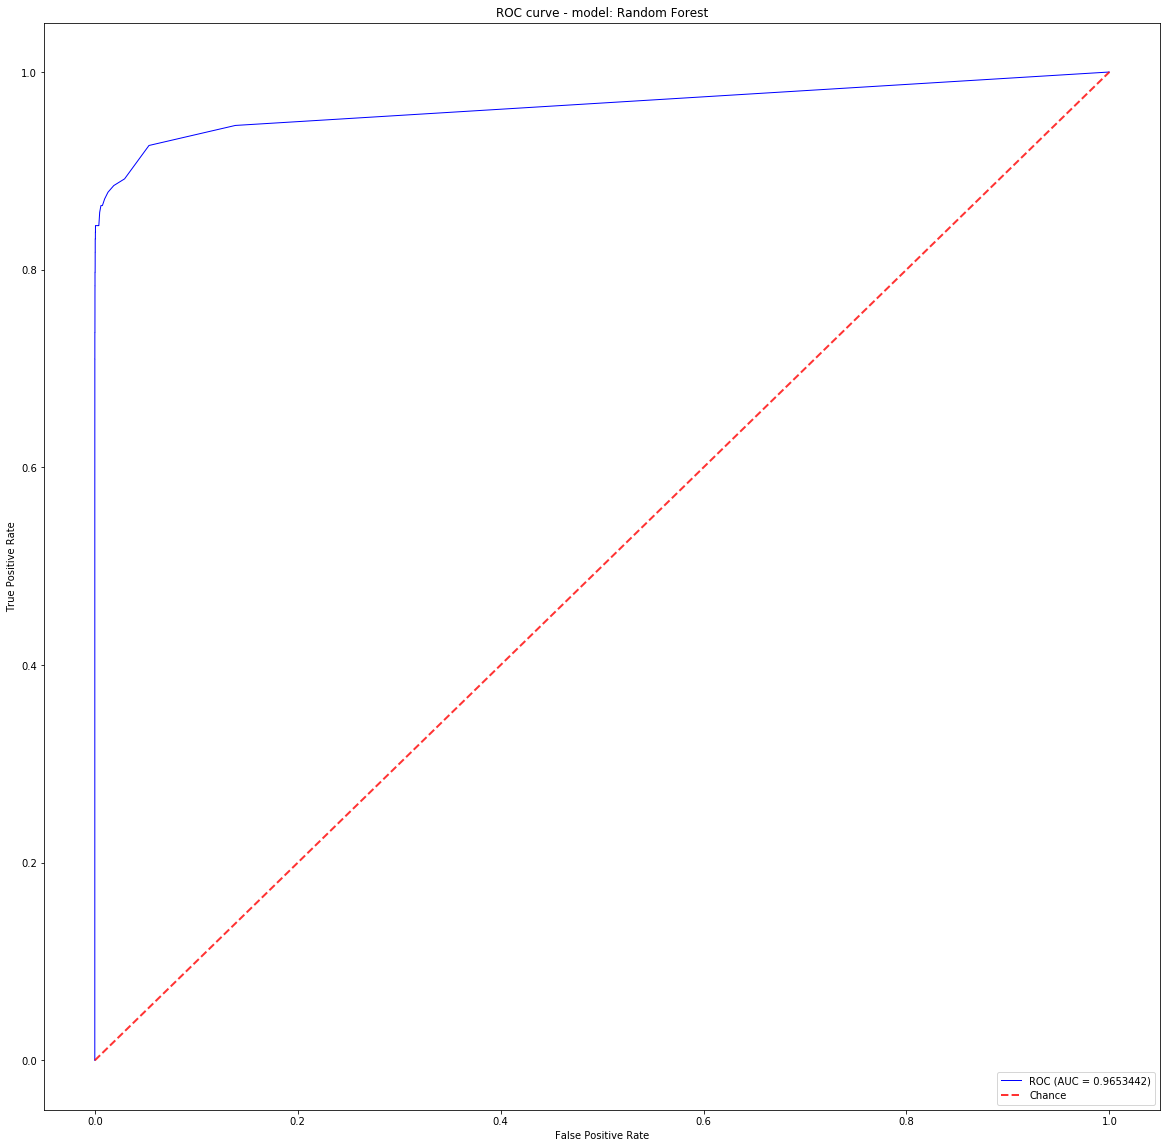

<Figure size 576x432 with 0 Axes>

Accuracy = 99.94%
Precision = 88.55%
Recall = 78.38%


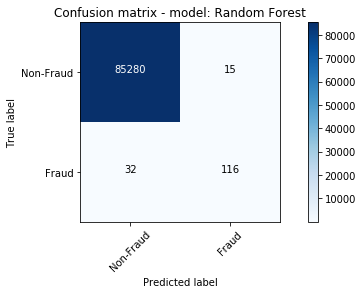

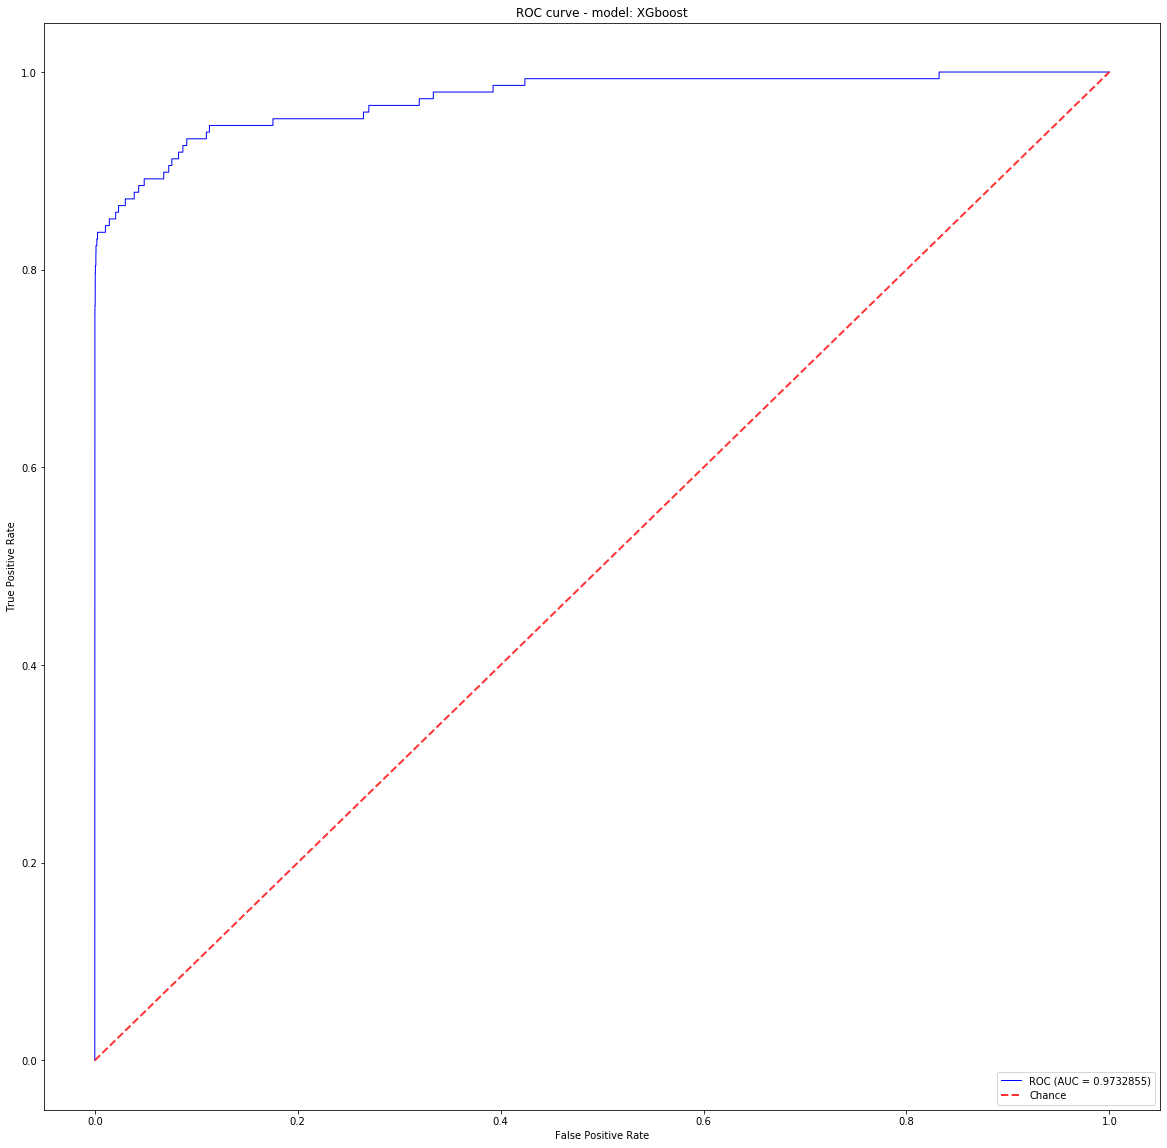

<Figure size 576x432 with 0 Axes>

Accuracy = 99.85%
Precision = 53.98%
Recall = 82.43%


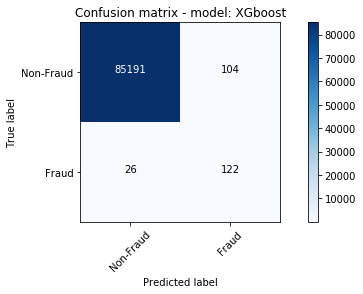

In [46]:
for clf in model:
    matrix_and_ROC_curve(clf, X_s_std, y_s, X_test_s_std, y_test)

### Result with ADASYN

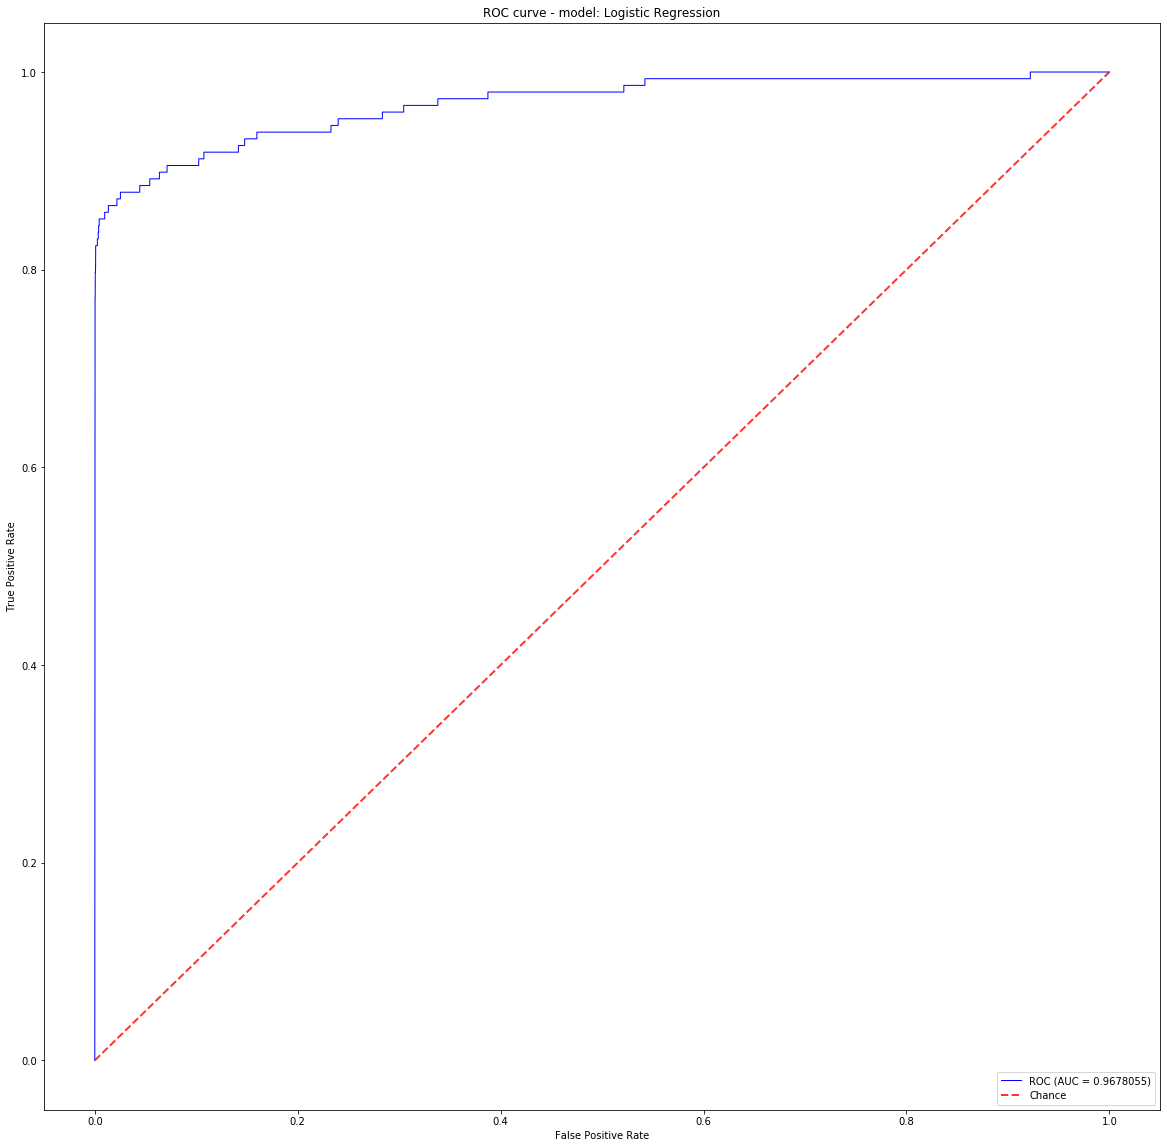

<Figure size 576x432 with 0 Axes>

Accuracy = 92.43%
Precision = 2.03%
Recall = 90.54%


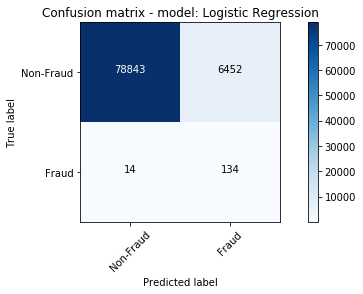

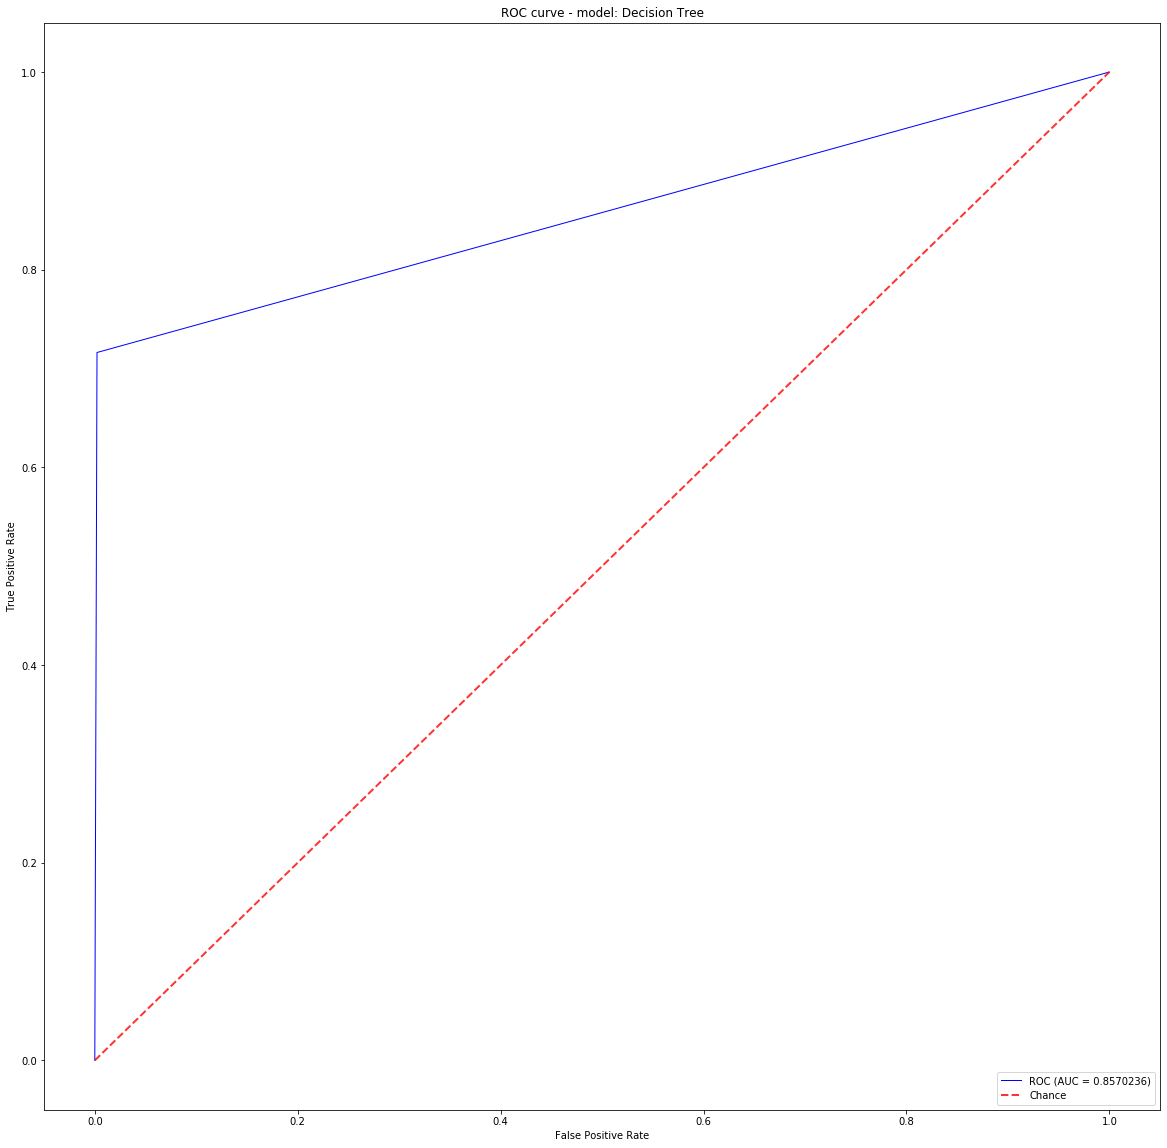

<Figure size 576x432 with 0 Axes>

Accuracy = 99.73%
Precision = 36.43%
Recall = 71.62%


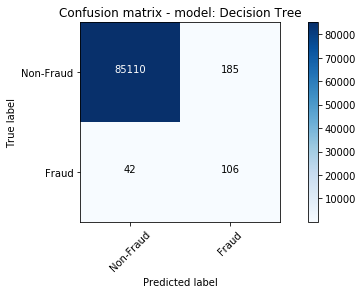

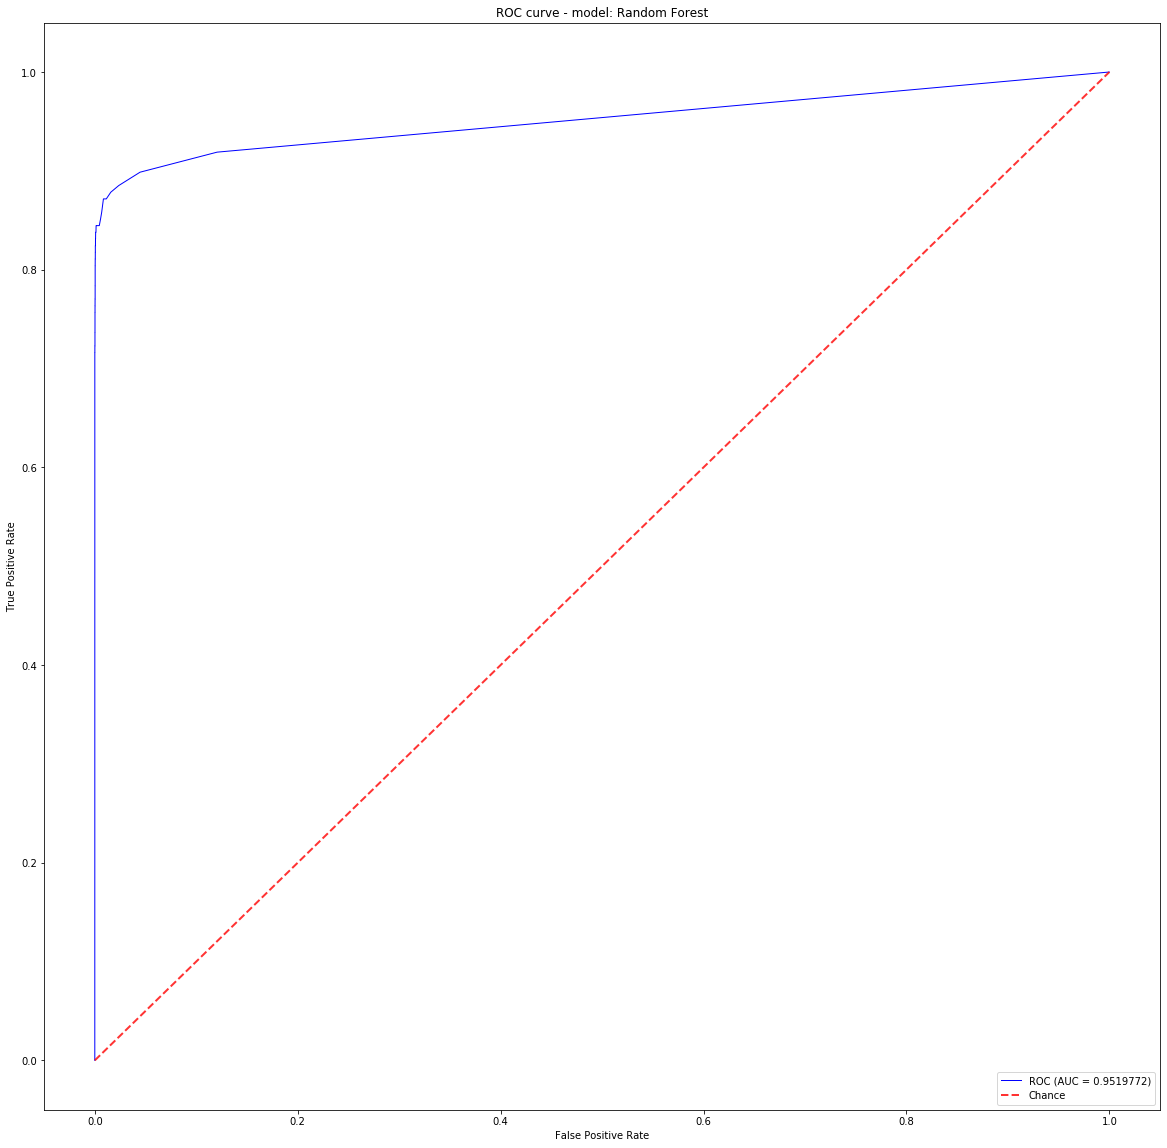

<Figure size 576x432 with 0 Axes>

Accuracy = 99.94%
Precision = 87.50%
Recall = 75.68%


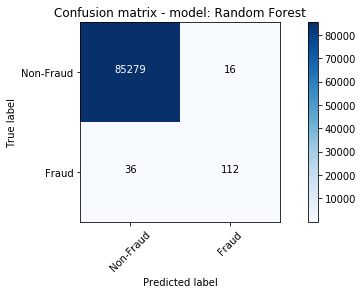

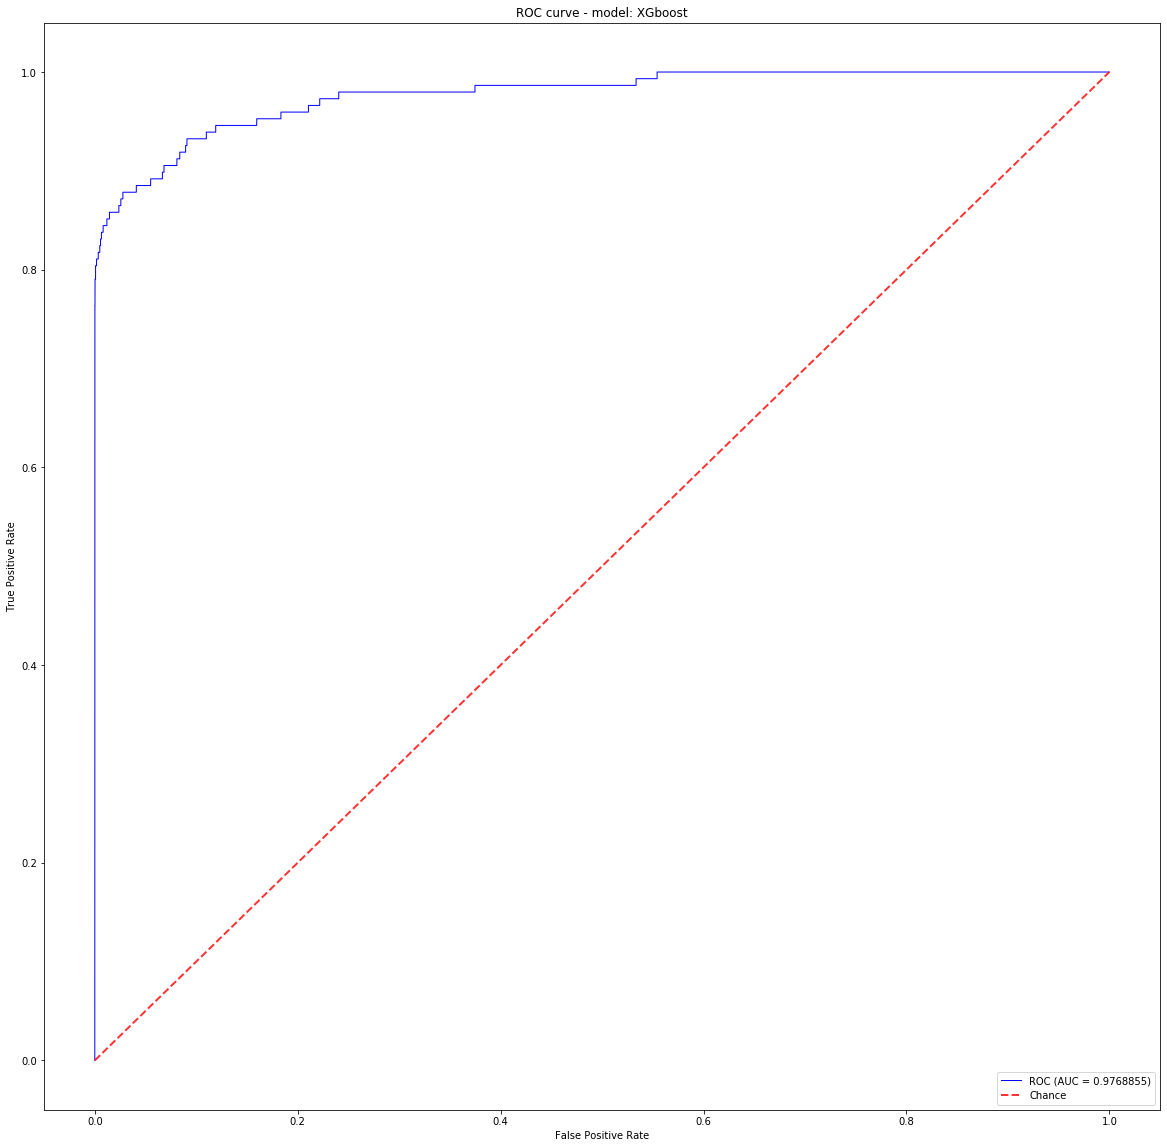

<Figure size 576x432 with 0 Axes>

Accuracy = 99.81%
Precision = 47.79%
Recall = 80.41%


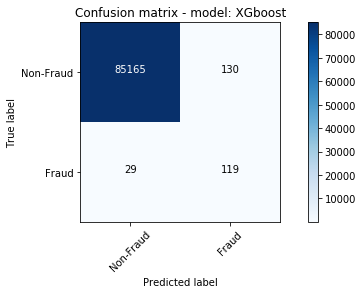

In [47]:
for clf in model:
    matrix_and_ROC_curve(clf, X_a_std, y_a, X_test_a_std, y_test)

# Results:-

## For Oversampling

- For Logistic Regression
   - ROC Cutoff : 0.96
   - Accuracy   : 97.58%
   - Precision  : 5.97%
   - Recall     : 87.84%


- For Decision Tree
   - ROC Cutoff : 0.83
   - Accuracy   : 99.91%
   - Precision  : 75.19%
   - Recall     : 67.57% 


- For Random Forest
   - ROC Cutoff : 0.95
   - Accuracy   : 99.95%
   - Precision  : 97.32%
   - Recall     : 73.65%


- For Xgboost
   - ROC Cutoff : 0.97
   - Accuracy   : 99.94%
   - Precision  : 89.15%
   - Recall     : 77.70%

## For SMOTE

- For Logistic Regression
   - ROC Cutoff : 0.96
   - Accuracy   : 97.42%
   - Precision  : 5.58%
   - Recall     : 87.16%


- For Decision Tree
   - ROC Cutoff : 0.84
   - Accuracy   : 99.69%
   - Precision  : 31.87%
   - Recall     : 68.92% 


- For Random Forest
   - ROC Cutoff : 0.96
   - Accuracy   : 99.94%
   - Precision  : 88.55%
   - Recall     : 78.38%


- For Xgboost
   - ROC Cutoff : 0.97
   - Accuracy   : 99.85%
   - Precision  : 53.98%
   - Recall     : 82.43%

## For ADASYN

- For Logistic Regression
   - ROC Cutoff : 0.96
   - Accuracy   : 92.43%
   - Precision  : 2.03%
   - Recall     : 90.54%


- For Decision Tree
   - ROC Cutoff : 0.85
   - Accuracy   : 99.73%
   - Precision  : 36.43%
   - Recall     : 71.62% 


- For Random Forest
   - ROC Cutoff : 0.95
   - Accuracy   : 99.94%
   - Precision  : 87.50%
   - Recall     : 75.68%


- For Xgboost
   - ROC Cutoff : 0.97
   - Accuracy   : 99.81%
   - Precision  : 47.79%
   - Recall     : 80.41%

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [48]:
# perform the best oversampling method on X_train & y_train

clf = RandomForestClassifier(random_state=42)
clf.fit(X_rosamp_std, y_rosamp) # fit on the balanced dataset
predicted = clf.predict(X_test_rosamp_std)
predicted_proba = clf.predict_proba(X_test_rosamp_std)

matrix = confusion_matrix(y_test, predicted)

print(matrix)

[[85292     3]
 [   39   109]]


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 5


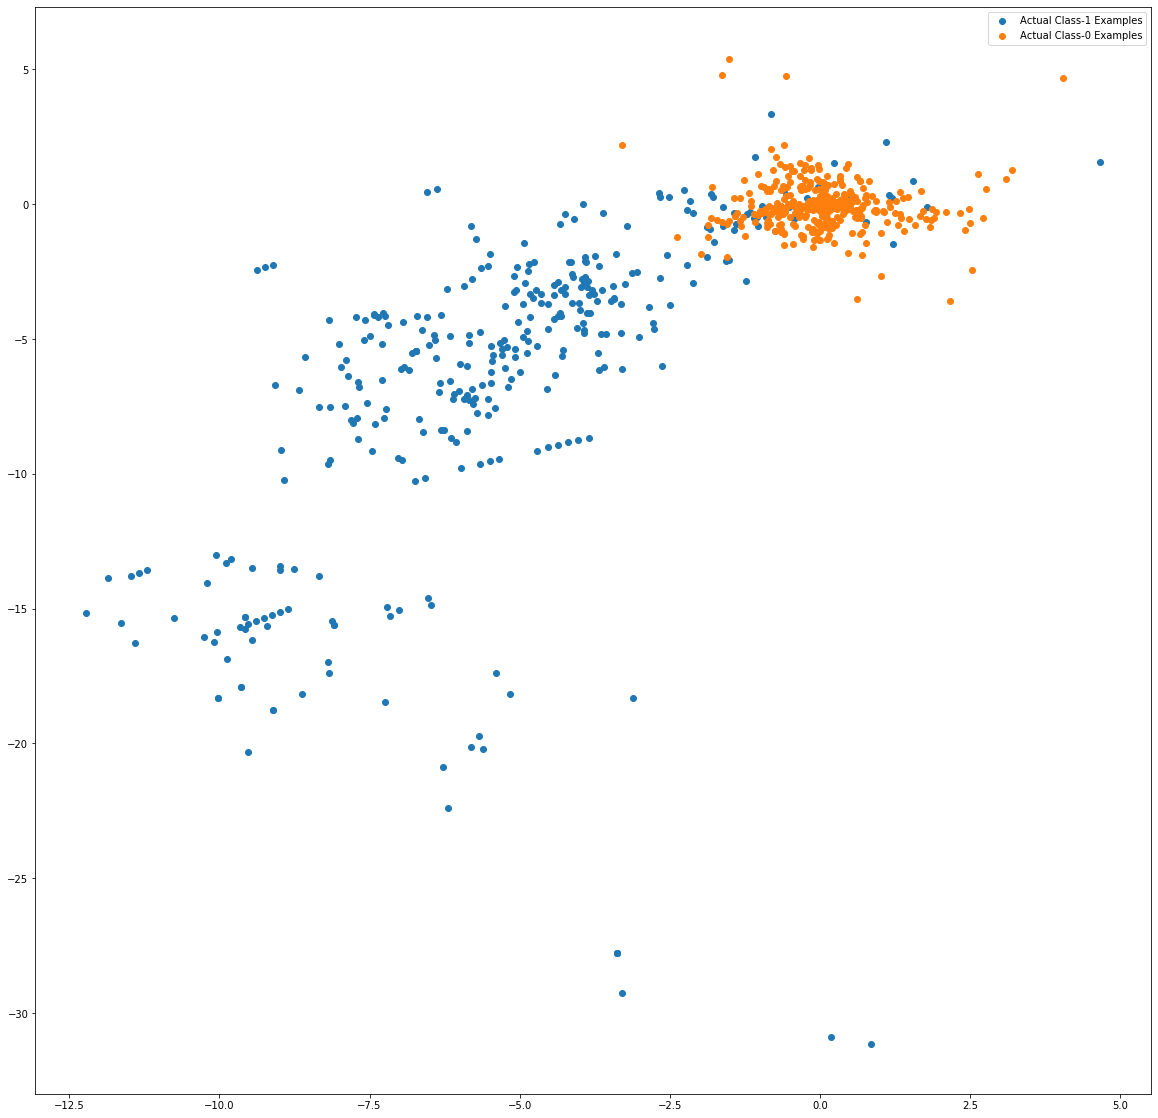

In [49]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print("FPR = ", fpr)
print("TPR = ", tpr)
print("threshold = ", threshold)

print('Train auc =', auc(fpr, tpr))

FPR =  [0.00000000e+00 3.51720499e-05 1.00000000e+00]
TPR =  [0.         0.73648649 1.        ]
threshold =  1
Train auc = 0.868225657218271
